15.09.2021 Севастьянов Даниил, урок

In [ ]:
#типы данных-int float bool кортеж словарь список датафрейм
#функция - def(a,b,c)
# return a+b+c
#с учителем- когда есть ответы
#без учителя- когда нет ответов
#классификация- разделить множество объектов на группы
#кластеризация- разделить множество объектов по признакам
#регрессия - определить значение 
#MSE- для регрессии
#recall для классификации
#accuracy - точность 

In [20]:
from google.colab import drive
drive.mount("/content/gdrive")
import pandas as pd
import numpy as np
df = pd.read_csv("/content/gdrive/MyDrive/ii/dataset.csv")
df



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,NaN,NaN,JPL 5,2437203.5,37203,19600926.0,J2000,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,NaN,NaN,8,2459000.5,59000,20200531.0,J2000,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,NaN,NaN,17,2459000.5,59000,20200531.0,J2000,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,NaN,NaN,JPL 3,2441956.5,41956,19731001.0,J2000,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.3

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [21]:
import pandas as pd
import numpy as np
df.isnull().sum()
print("##########################")
df=df.drop(['name','prefix'],axis=1)
df=df.drop(['id','spkid','full_name','equinox','orbit_id','pdes'],axis=1)

##########################


In [4]:
df


,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,N,3.400,939.400,0.0900,0.200,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.200,545.000,0.1010,18.000,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.330,246.596,0.2140,10.594,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.000,525.400,0.4228,0.200,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.900,106.699,0.2740,3.140,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,N,N,17.135,NaN,NaN,NaN,2437203.5,37203,19600926.0,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,N,N,18.500,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,Y,Y,20.400,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,N,N,18.071,NaN,NaN,NaN,2441956.5,41956,19731001.0,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,0.893896,347.877506,3.169800e-02,5.966200e-01,5.478400e-01,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [22]:
df=df.dropna()

In [23]:
df.shape

(131142, 37)

In [24]:
df['pha']

0         N
1         N
2         N
3         N
4         N
         ..
891599    N
891841    N
894103    N
901055    N
909489    N
Name: pha, Length: 131142, dtype: object

In [25]:
df['pha'].unique()

array(['N', 'Y'], dtype=object)

In [26]:
df['pha'].value_counts()

N    130961
Y       181
Name: pha, dtype: int64

In [27]:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'APO', 'ATE', 'CEN',
       'AST', 'TNO'], dtype=object)

In [28]:
df['pha']=df['pha'].map({'Y':1,'N':0})
df=pd.get_dummies(df)
df

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,neo_N,neo_Y,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,0,3.40,939.400,0.0900,0.200,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.43301,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,4.20,545.000,0.1010,18.000,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,0.35936,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,5.33,246.596,0.2140,10.594,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,0.33848,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,3.00,525.400,0.4228,0.200,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,0.39980,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,6.90,106.699,0.2740,3.140,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,0.52191,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,0,16.20,3.793,0.0210,1.375,2459000.5,59000,20200531.0,0.159579,3.169936,2.664080,27.102826,309.042331,19.782056,234.794606,3.675791,0.174634,2.459717e+06,2.022052e+07,2061.456319,5.643960,1.66139,646.563146,3.106900e-07,2.272900e-07,1.121200e-06,2.602600e-05,1.897900e-05,4.951000e-05,5.127900e-05,2.635700e-07,1.878300e-08,3.498100e-04,2.217200e-04,0.59145,1,0,0,0,0,0,0,0,1,0,0,0,0
891841,0,17.40,2.696,0.0610,0.701,2459000.5,59000,20200531.0,0.074890,2.550597,2.359584,11.583615,246.280735,170.346154,241.854661,2.741610,0.241959,2.459489e+06,2.021100e+07,1487.857000,4.073530,1.37273,534.225334,5.761500e-07,1.370200e-06,2.637600e-06,1.788500e-05,1.538400e-04,3.026900e-03,3.326500e-03,1.472800e-06,1.949700e-07,1.413600e-02,1.198900e-03,0.42754,1,0,0,0,0,0,0,0,1,0,0,0,0
894103,0,17.20,3.271,0.0720,1.074,2459000.5,59000,20200531.0,0.287894,3.050244,2.172096,14.461482,343.918035,342.641550,249.675621,3.928393,0.185013,2.459597e+06,2.022012e+07,1945.809553,5.327336,1.16559,453.612660,2.215400e-06,1.762400e-06,8.008000e-06,6.736600e-05,1.160600e-04,1.493200e-03,5.880600e-04,2.269800e-06,1.603500e-07,2.675200e-03,1.686400e-03,0.53016,1,0,0,0,0,0,0,0,1,0,0,0,0
901055,0,16.00,3.009,0.0780,0.981,2459000.5,59000,20200531.0,0.240246,3.191395,2.424676,25.525292,328.424134,62.229574,232.967849,3.958114,0.172875,2.459735e+06,2.022060e+07,2082.424614,5.701368,1.52330,592.822661,2.054800e-06,7.684100e-07,5.987100e-06,3.376000e-05,2.546000e-05,3.313800e-04,8.637800e-05,9.530100e-07,6.243600e-08,3.265500e-04,7.520900e-04

In [29]:
X=df.drop('pha',axis=1)
y=df['pha']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)



логистическая регрессия:

```
# Выбран кодовый формат
```



In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

0.9992883104999619


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SVM:

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
model=SVC()
cvs0 = cross_val_score(estimator=model, X=X, y=y, cv=6, scoring='accuracy')
print(cvs0.mean())

0.998619816687255


KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

print("Accuracy:", accuracy_score(y_test,y_pred))

кнн работает довольно медленно с большими объёмами данных, как в нашем случае 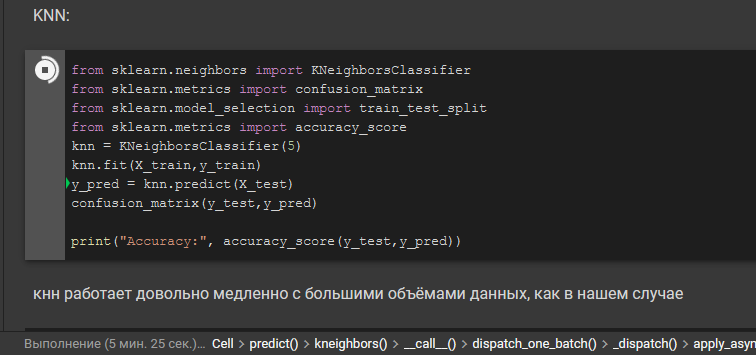

я остановил выполнение кнн, т к он слишком долго выполнялся

Дерево решений:


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred_tree))


Accuracy: 0.9999491650357115


Самодельная нейронка:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

model = Sequential()
model.add(Dense(47, input_dim=47, activation='relu'))

model.add(Dense(25, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy', 'Recall'])
model.fit(X, y, epochs = 15)

ВЫВОД:
Лучше всего в данном случае работают логистическая регрессия, метод опорных векторов и дерево, они все работают быстро и возвращают высокую точность(более 99%), кнн в данном случае работает очень очень очень медленно, так что я её не дождался, самодельная нейронка работает очень плохо и тоже медленно. 
